# Assignement 1 study of Master data from IS Academia

## useful imports

In [2]:
import pandas as pd
import scipy.stats as stats
import numpy as np

## Import Master data

Reading the pickle with the master data frame

In [3]:
master_df = pd.read_pickle("master")
master_df.head()

Civilité  Orientation Bachelor  \
Year      Semester          Sciper                                   
2016-2017 Master semestre 1 271331  Monsieur                   NaN   
                            273101  Monsieur                   NaN   
                            267543  Monsieur                   NaN   
                            202293  Monsieur                   NaN   
                            228219  Monsieur                   NaN   

                                    Orientation Master  \
Year      Semester          Sciper                       
2016-2017 Master semestre 1 271331                 NaN   
                            273101                 NaN   
                            267543                 NaN   
                            202293                 NaN   
                            228219                 NaN   

                                             Spécialisation  Filière opt.  \
Year      Semester          Sciper                                          
2016-2017 Master semestre 1 271331                      NaN           NaN   
                            273101                      NaN           NaN   
                            267543                      NaN           NaN   
                            202293                      NaN           NaN   
                            228219  Foundations of Software           NaN   

                                   Mineur   Statut Type Echange Ecole Echange  
Year      Semester          Sciper                                             
2016-2017 Master semestre 1 271331    NaN  Présent          NaN           NaN  
                            273101    NaN  Présent          NaN           NaN  
                            267543    NaN  Présent          NaN           NaN  
                            202293    NaN  Présent          NaN           NaN  
                            228219    NaN  Présent          NaN           NaN

In [5]:
s1 = master_df.xs('Master semestre 1', level=1).reset_index(0)
s1 = s1[s1.Statut == 'Présent']

pa = master_df.xs('Projet Master automne', level=1).reset_index(0)

pp = master_df.xs('Projet Master printemps', level=1).reset_index(0)

master_sciper = s1.ix[s1.index & (pa.index | pp.index)].index

master_s1_papp = master_df.loc[master_df.index.get_level_values("Sciper").isin(master_sciper.values)]

In [7]:
master_s1_papp

Civilité  Orientation Bachelor  \
Year      Semester                Sciper                                   
2016-2017 Projet Master automne   166075  Monsieur                   NaN   
                                  243163  Monsieur                   NaN   
                                  194182  Monsieur                   NaN   
                                  213664  Monsieur                   NaN   
                                  214637  Monsieur                   NaN   
                                  243164  Monsieur                   NaN   
                                  203947  Monsieur                   NaN   
                                  203945  Monsieur                   NaN   
                                  244136  Monsieur                   NaN   
                                  229467  Monsieur                   NaN   
                                  224704  Monsieur                   NaN   
                                  245486  Monsieur                   NaN   
                                  259766  Monsieur                   NaN   
                                  214632  Monsieur                   NaN   
                                  194328  Monsieur                   NaN   
                                  212765  Monsieur                   NaN   
                                  212790  Monsieur                   NaN   
                                  254604  Monsieur                   NaN   
                                  218353  Monsieur                   NaN   
                                  255137  Monsieur                   NaN   
                                  260636  Monsieur                   NaN   
                                  186260  Monsieur                   NaN   
                                  212859  Monsieur                   NaN   
                                  217632  Monsieur                   NaN   
                                  201600  Monsieur                   NaN   
                                  247455  Monsieur                   NaN   
                                  255163  Monsieur                   NaN   
                                  204253  Monsieur                   NaN   
                                  227356  Monsieur                   NaN   
                                  260811  Monsieur                   NaN   
...                                            ...                   ...   
2008-2009 Projet Master automne   172264  Monsieur                   NaN   
          Projet Master printemps 172687  Monsieur                   NaN   
                                  180072  Monsieur                   NaN   
                                  160225  Monsieur                   NaN   
                                  165819  Monsieur                   NaN   
                                  179878  Monsieur                   NaN   
                                  177476  Monsieur                   NaN   
2007-2008 Master semestre 1       180027    Madame                   NaN   
                                  154573    Madame                   NaN   
                                  172687  Monsieur                   NaN   
                                  180072  Monsieur                   NaN   
                                  160225  Monsieur                   NaN   
                                  166805  Monsieur                   NaN   
                                  172264  Monsieur                   NaN   
                                  165819  Monsieur                   NaN   
                                  166491  Monsieur                   NaN   
                                  179878  Monsieur                   NaN   
                                  177476  Monsieur                   NaN   
          Master semestre 2       180027    Madame                   NaN   
                                  160213  Monsieur                   NaN   
              

In [43]:
master_semesters = []
scipers = master_s1_papp.index.get_level_values(2).drop_duplicates()
print(scipers.shape)
for sciper in scipers:
    student = master_s1_papp.xs(sciper, level=2)
    num_sems = student['Statut'].count()
    civ = student['Civilité'][0]
    spec = student['Spécialisation'][0]
    mineur = student['Mineur'][0]
    # If the student has neither a minor nor a spec, we write him as in no spé
    if str(mineur) == "nan" and str(spec) == "nan":
        spec = "aucun"
    
    master_semesters.append([sciper, civ, num_sems, mineur, spec])

master_semesters = pd.DataFrame(master_semesters,columns=['Sciper', 'Civilité', 'Number of semesters', 'Mineur', 'Spécialisation'])

(114,)
nan
nan
nan
Mineur en Management, technologie et entrepreneuriat
nan
nan
nan
Mineur en Management, technologie et entrepreneuriat
Mineur en Management, technologie et entrepreneuriat
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Information security minor
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Mineur en Biocomputing
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Mineur en Management, technologie et entrepreneuriat
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [44]:
master_semesters

,Sciper,Civilité,Number of semesters,Mineur,Spécialisation
0,166075,Monsieur,5,NaN,aucun
1,243163,Monsieur,3,NaN,aucun
2,194182,Monsieur,7,NaN,Foundations of Software
3,213664,Monsieur,5,"Mineur en Management, technologie et entrepren...",NaN
4,214637,Monsieur,5,NaN,aucun
5,243164,Monsieur,5,NaN,aucun
6,203947,Monsieur,5,NaN,aucun
7,203945,Monsieur,5,"Mineur en Management, technologie et entrepren...",NaN
8,244136,Monsieur,5,"Mineur en Management, technologie et entrepren...",NaN
9,229467,Monsieur,3,NaN,aucun


In [46]:
spec_count = master_semesters.groupby('Spécialisation')['Spécialisation'].count()
sems_mean_spec = master_semesters.groupby('Spécialisation')['Number of semesters'].mean()
minor_count = master_semesters.groupby('Mineur')['Mineur'].count()
sems_mean_minor = master_semesters.groupby('Mineur')['Number of semesters'].mean()
sems_stats_spec = pd.concat([spec_count,sems_mean_spec], axis=1, keys=['Count','Mean number of semesters'])
sems_stats_minor = pd.concat([minor_count,sems_mean_minor], axis=1, keys=['Count','Mean number of semesters'])
sems_stats_tot = pd.concat([sems_stats_minor, sems_stats_spec], axis=0, keys=['mineur', 'spécialisation'])
print(master_semesters.median())
sems_stats_tot

Sciper                 202216.0
Number of semesters         4.0
dtype: float64


Count  \
mineur         Information security minor                              1   
               Mineur en Biocomputing                                  1   
               Mineur en Management, technologie et entreprene...      4   
               aucune                                                108   
spécialisation Biocomputing                                            1   
               Computer Engineering - SP                               2   
               Foundations of Software                                 7   
               Information Security - SP                               2   
               Internet computing                                     10   
               Service science                                         1   
               Signals, Images and Interfaces                          2   
               Software Systems                                        2   
               aucun                                                  81   
               aucune                                                  6   

                                                                   Mean number of semesters  
mineur         Information security minor                                          5.000000  
               Mineur en Biocomputing                                              5.000000  
               Mineur en Management, technologie et entreprene...                  4.750000  
               aucune                                                              4.231481  
spécialisation Biocomputing                                                        6.000000  
               Computer Engineering - SP                                           5.000000  
               Foundations of Software                                             5.142857  
               Information Security - SP                                           5.000000  
               Internet computing                                                  4.700000  
               Service science                                                     5.000000  
               Signals, Images and Interfaces                                      5.500000  
               Software Systems                                                    5.000000  
               aucun                                                               3.975309  
               aucune                                                              4.833333

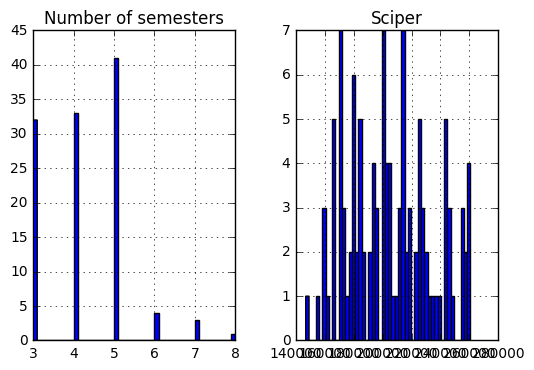

In [21]:
import matplotlib.pyplot as plt
master_semesters.hist(bins=50)
plt.show()

In [187]:
total_mean = master_semesters['Number of semesters'].mean()
alpha = 0.05

for name, counts in master_semesters.groupby('Spécialisation')['Number of semesters']:
    test = stats.ttest_1samp(counts.values, total_mean)
    print("Results for {},".format(name), "the seperate means are :", counts.mean(), " and ", total_mean)
    print("Number of values :", len(counts.values))
    pvalue = test.pvalue
    
    if np.isnan(pvalue):
        print("not enough values to give a significant result")
    else:    
        print("Test p-value = %f" % pvalue)
        print("The means are statistically different") if test.pvalue < alpha else print("The means are statistically equal")
    print("")
        
        

Results for Biocomputing, the seperate means are : 6.0  and  4.26315789474
Number of values : 1
not enough values to give a significant result

Results for Computer Engineering - SP, the seperate means are : 5.0  and  4.26315789474
Number of values : 2
Test p-value = 0.000000
The means are statistically different

Results for Foundations of Software, the seperate means are : 5.14285714286  and  4.26315789474
Number of values : 7
Test p-value = 0.134314
The means are statistically equal

Results for Information Security - SP, the seperate means are : 5.0  and  4.26315789474
Number of values : 2
Test p-value = 0.000000
The means are statistically different

Results for Internet computing, the seperate means are : 4.7  and  4.26315789474
Number of values : 10
Test p-value = 0.070992
The means are statistically equal

Results for Service science, the seperate means are : 5.0  and  4.26315789474
Number of values : 1
not enough values to give a significant result

Results for Signals, Images

/usr/local/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
